# Pandas tutorial
I've deliberately kept the examples as non-geosciency as possible - As such...
This tutorial largely, with some extra bits, incorporates elements from here; https://github.com/jvns/pandas-cookbook


However I couldn't however resist not showing you what you can do (or rather a taste of what I use it for) -> phreeqc modelling with Pandas basically modelling for the paper I'm writing at the moment!

In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_rows = 50  #I think the default is something like 50/100, for a while I had a need to see lots
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5) # size figures
from IPython.core.display import HTML

#bellow is some settings using some cascading style sheets to render pandas tables in a sultry fashion
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

/Users/hamishrobertson/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Read CSV

Pandas allows to you take a range of data sources. A really common one is a CSV (comma-seperated values) file. So, so much stuff is dissemeninated in CSV format. The seperator may well not be a comma...

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [2]:
broken_df = pd.read_csv('data/bikes.csv',encoding='latin1') # Had to set it to latin to get anywhere, regardless the data is still messed up

## Lets have a look - a few different ways

In [3]:
broken_df.head(5)

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


In [4]:
broken_df[:5]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`) -DONE ALREADY!!
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

By default the index is the row number - sometimes useful, sometimes not.

In [5]:
fixed_df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df.head(5)

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [6]:
fixed_df['Berri 1'] #show them tab auto-complete

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
              ... 
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10-28    1310
2012-10-29    2919
2012-10-30    2887
2012-10-31    2634
2012-11-01    2405
2012-11-02    1582
2012-11-03     844
2012-11-04     966
2012-11-05    2247
Name: Berri 1, Length: 310

In [7]:
fixed_df.Rachel1[:] #you can also use most columns (i.e. those without spaces) as functions - I find this quite useful 
# or rather quite succinct

Date
2012-01-01      16
2012-01-02      43
2012-01-03      58
2012-01-04      61
2012-01-05      95
2012-01-06      75
2012-01-07      54
2012-01-08      63
2012-01-09     173
2012-01-10     241
2012-01-11     194
2012-01-12      63
2012-01-13       0
2012-01-14       1
2012-01-15       0
2012-01-16       0
2012-01-17       0
2012-01-18       0
2012-01-19       0
2012-01-20       1
2012-01-21       0
2012-01-22       0
2012-01-23       0
2012-01-24       0
2012-01-25       0
              ... 
2012-10-12    3224
2012-10-13    2309
2012-10-14     952
2012-10-15    3183
2012-10-16    3593
2012-10-17    3834
2012-10-18    4245
2012-10-19    1486
2012-10-20    2243
2012-10-21    1648
2012-10-22    3721
2012-10-23    3554
2012-10-24    3622
2012-10-25    3767
2012-10-26    4578
2012-10-27    2471
2012-10-28    1876
2012-10-29    2795
2012-10-30    2790
2012-10-31    2570
2012-11-01    2461
2012-11-02    1888
2012-11-03    1302
2012-11-04    1374
2012-11-05    2430
Name: Rachel1, Length: 310

## Cool so how do I visualize that data?

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

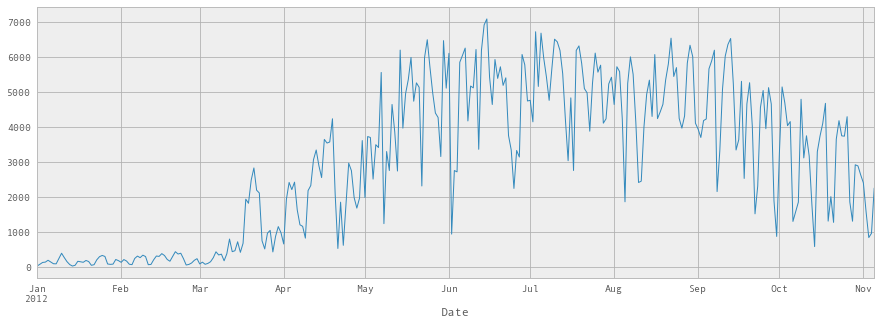

In [8]:
fixed_df['Berri 1'].plot() #note this calls matplotlib

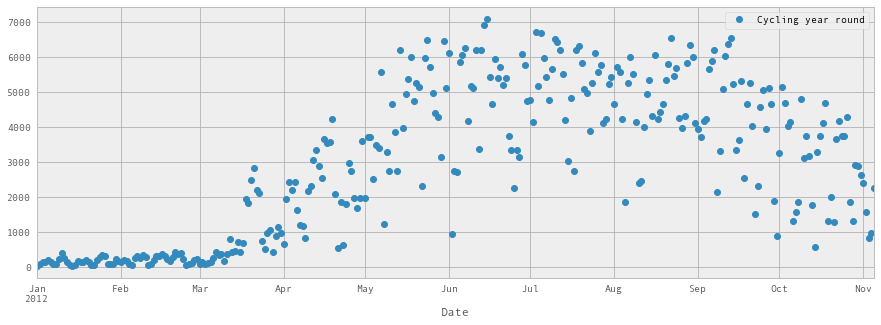

In [9]:
fixed_df.plot(x=fixed_df.index,y='Berri 1',label='Cycling year round',style='o') #note cant pass 'Date' as its the index
#also pandas was being 'weird' about turning into a scatter plot - this is a line plot with no lines but dots!


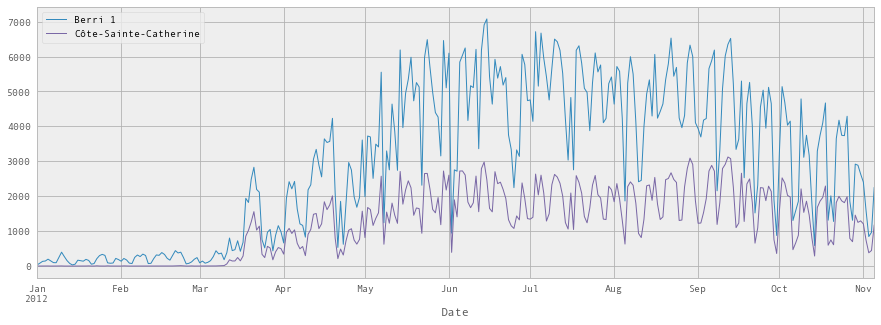

In [10]:
#can also add a second graph on top of it, note have to be in the same cell for jupyter (my highest rated answer on stackoverflow so far!)!
ax1=fixed_df.plot(x=fixed_df.index,y='Berri 1',label='Berri 1')
fixed_df.plot(x=fixed_df.index,y='Côte-Sainte-Catherine',ax=ax1,label='Côte-Sainte-Catherine')

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

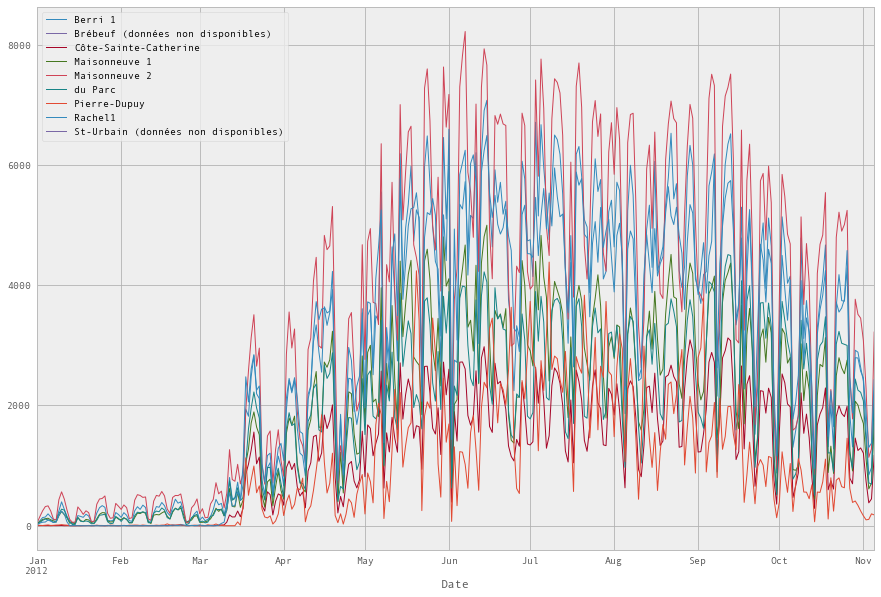

In [11]:
fixed_df.plot(figsize=(15, 10))

# 2 Next challenge -> Larger data set

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [12]:
complaints = pd.read_csv('data/311-service-requests.csv')

/Users/hamishrobertson/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.

For now we're going to ignore it and hope we don't run into a problem, but in the long run we'd need to investigate this warning.

In [13]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011,258 WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739913,-74.000790,"(40.73991339303542, -74.00079028612932)"
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"


To select a column, we index with the name of the column, like this:

In [14]:
complaints['Complaint Type']

0          Noise - Street/Sidewalk
1                  Illegal Parking
2               Noise - Commercial
3                  Noise - Vehicle
4                           Rodent
5               Noise - Commercial
6                 Blocked Driveway
7               Noise - Commercial
8               Noise - Commercial
9               Noise - Commercial
10        Noise - House of Worship
11              Noise - Commercial
12                 Illegal Parking
13                 Noise - Vehicle
14                          Rodent
15        Noise - House of Worship
16         Noise - Street/Sidewalk
17                 Illegal Parking
18          Street Light Condition
19              Noise - Commercial
20        Noise - House of Worship
21              Noise - Commercial
22                 Noise - Vehicle
23              Noise - Commercial
24                Blocked Driveway
                    ...           
111044     Noise - Street/Sidewalk
111045                Water System
111046              

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [15]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


Combine slices

In [16]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

or

In [17]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

Or, feed it a small list - note here you have to use 2 sq brackets - one for the index and one for the list

In [18]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


In [19]:
compandborough=['Complaint Type','Borough']
complaints[compandborough][:5]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN


# Higher level function time
### Mirror, mirror on the wall...whats the most bitched about public nuissance in NYC?

Ok so this is possible in excel - lets have a look there at pivot tables

In [20]:
complaints['Complaint Type'].value_counts()

HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Taxi Complaint                    

In [21]:
complaint_counts=complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

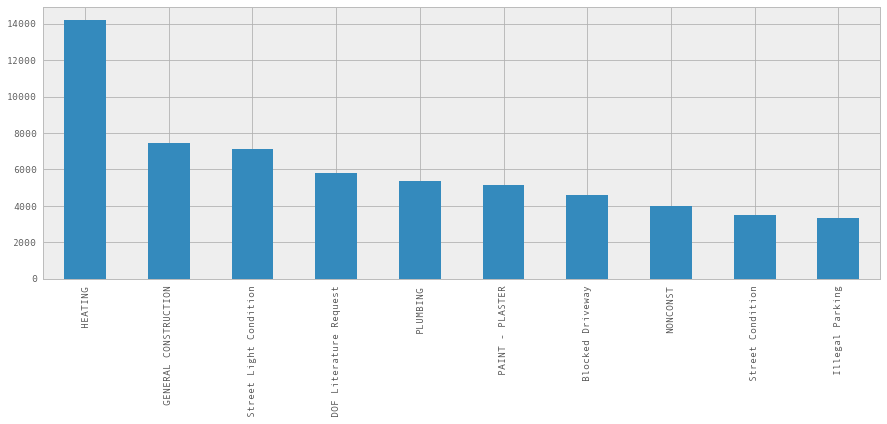

In [22]:
complaint_counts[:10].plot(kind='bar')

## So I only want noise complaints....how?

In [23]:
complaints.head(5)
#So having done some sluething a true noise complaint (i.e. some student is having a massive house party til 6am)
#is 'Noise - Street/Sidewalk'

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [73]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"] 
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


hows this working??

In [25]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
          ...  
111044     True
111045    False
111046    False
111047    False
111048     True
111049    False
111050    False
111051    False
111052    False
111053    False
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator to find the massive house pasrties in your neighbourhood - the question is then - why are we not already mates?

In [74]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
is_wild = complaints['Descriptor'] == "Loud Music/Party"
complaints[is_noise & in_brooklyn & is_wild][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"
656,26595791,10/30/2013 06:07:39 PM,10/30/2013 06:23:54 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11233,90 MACDOUGAL STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679502,-73.917658,"(40.67950189657117, -73.91765754790949)"
5584,26585573,10/29/2013 08:15:59 PM,10/29/2013 10:57:37 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11238,317 FRANKLIN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688705,-73.957148,"(40.68870464353258, -73.95714818286503)"


In [27]:
# is anyone being wild all the time?
cool=complaints[is_noise & in_brooklyn & is_wild]
cool['Incident Address'].value_counts()[:5]

90 DOWNING STREET      8
412 SUYDAM STREET      4
1054 ROGERS AVE        3
SOUTH 4TH STREET       3
320 STERLING STREET    2
Name: Incident Address, dtype: int64

# 90 Downing street...bloody legends
Edgy place - some guy giving the finger to the street view car!

![90 Downing street, Brooklyn](/Volumes/HammysHD/modflowTeaching/PandasTutorial/90downing.png "90 Down")

In [88]:
complaints[is_noise & in_brooklyn & is_wild]['Incident Address'].value_counts()[:5]
# Can shorten but nice to break it up a bit or if you think you might want to re-use the list somewhere else

90 DOWNING STREET      8
412 SUYDAM STREET      4
1054 ROGERS AVE        3
SOUTH 4TH STREET       3
320 STERLING STREET    2
Name: Incident Address, dtype: int64

In [29]:
complaints[is_noise & in_brooklyn & is_wild][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party
5991,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 04:53:21 PM,Loud Music/Party
6000,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 04:51:10 PM,Loud Music/Party
8512,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 04:20:00 AM,Loud Music/Party
11211,Noise - Street/Sidewalk,BROOKLYN,10/28/2013 11:23:56 PM,Loud Music/Party
11220,Noise - Street/Sidewalk,BROOKLYN,10/28/2013 11:17:12 PM,Loud Music/Party


In [30]:
complaints[is_noise & in_brooklyn & is_wild].describe() #kinda doesnt work on this data set as quite 'stringy' but
# often a nice way of quickly getting an idea of the data set 

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
count,2.340000e+02,2.330000e+02,233.000000,0.0,233.000000,233.000000
mean,2.649350e+07,9.982216e+05,186728.210300,NaN,40.679187,-73.949625
std,4.735452e+04,8.621932e+03,10655.443721,NaN,0.029246,0.031083
min,2.642796e+07,9.747460e+05,149133.000000,NaN,40.576011,-74.034232
25%,2.644395e+07,9.943670e+05,180459.000000,NaN,40.661984,-73.963508
50%,2.648552e+07,9.968030e+05,188186.000000,NaN,40.683202,-73.954722
75%,2.651898e+07,1.003670e+06,196134.000000,NaN,40.704994,-73.929965
max,2.659579e+07,1.022674e+06,206170.000000,NaN,40.732559,-73.861476


# Brief digression - Numpy arrays
Numpy is the low level - Pandas is 'built' on top with the slick functions
i.e. on the inside of a pandas series (pd.Series) is a numpy array


In [31]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

If you add `.values` to the end of any `Series`, you'll get its internal numpy array. Quite useful as lots of modules accept numpy arrays 

In [32]:
np.array([1,2,3])

array([1, 2, 3])

In [33]:
pd.Series([1,2,3]).values

array([1, 2, 3])

So this binary-array-selection business is actually something that works with any numpy array:

In [34]:
arr = np.array([1,2,3])

In [35]:
arr != 2

array([ True, False,  True], dtype=bool)

In [36]:
arr[arr != 2]

array([1, 3])

# So Brooklyn we know is edgy (Jay Z, ODB, Mos Def etc etc...) - but which borough has the most noise complaints?

In [37]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
#return binary
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [38]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [39]:
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

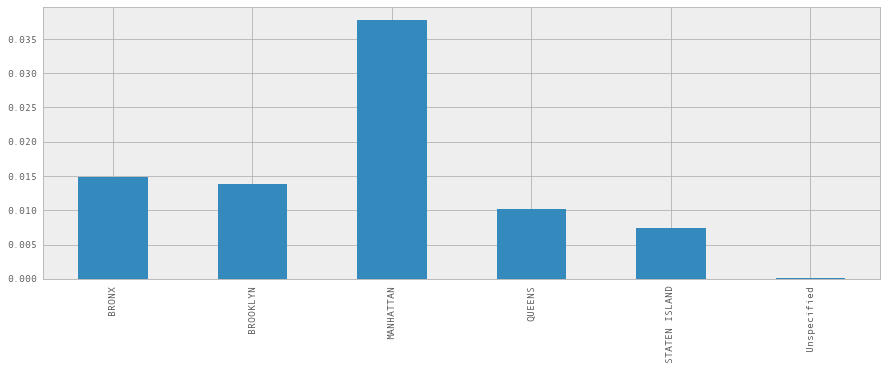

In [40]:
(noise_complaint_counts / complaint_counts).plot(kind='bar')

# Adding a 'weekday' column to our dataframe

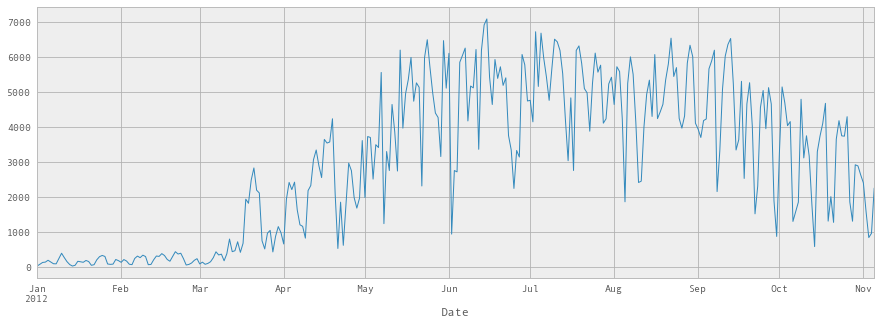

In [41]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()

In [42]:
berri_bikes = bikes[['Berri 1']].copy()

In [43]:
# why copy - you could actually just index and return (its what I've always done)
# basically this provides a bomb through method of not screwing up (preserving) the original
# dataframe

In [44]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [45]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

note the length is 310 - thats not 365! - who knows why
as I said before - pandas has some super useful high level functionality -> 

In [46]:
berri_bikes.index.day #day of the month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

In [47]:
berri_bikes.index.weekday #day of the week - 0 is a monday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

Why might you need this -> example - I have a very large dataset containing data on chemical analyses from 50's to present  day. I was able to simply (4 lines of code) see if there was any statistically significant relationship between the analysis error and the day of the week the test was perfomed on.

OK lets add the weekday into the dataframe as a new column using the .loc command

In [48]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:20]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3
2012-01-06,146,4
2012-01-07,98,5
2012-01-08,95,6
2012-01-09,244,0


# Lets analyize - add the cyclists up by weekday
This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, if you're familiar with that. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".


In [49]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
#you can also change the sum to max, numpy.median, few others
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [50]:
#Also can look at stuff like mean, counts etc. My most used functions
#Commonely used with a sortby
meanie = berri_bikes.groupby('weekday').mean()
meanie

,Berri 1
weekday,
0,2984.400000
1,3075.113636
2,3476.636364
3,3639.340909
4,3222.068182
5,2308.590909
6,2206.888889


In [51]:
countie = berri_bikes.groupby('weekday').count()
countie

,Berri 1
weekday,
0,45
1,44
2,44
3,44
4,44
5,44
6,45


In [52]:
# I dont like 0,1,2,3 etc... can rename the index;
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


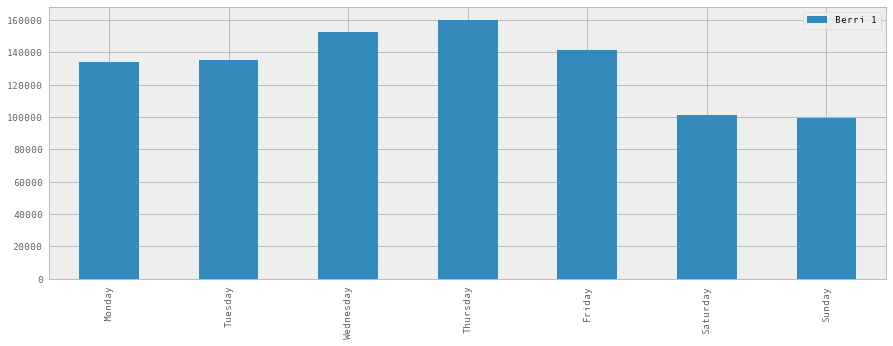

In [53]:
weekday_counts.plot(kind='bar')

In [54]:
#Montreal is clearly a commuter town

In [55]:
weather_2012 = pd.read_csv('data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Similar to previously we can probe wether the column contains 'snow' but perhaps not explicitly snow

In [56]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

In [57]:
# Not super useful - look at last 20 binary results
is_snowing.tail(20)

Date/Time
2012-12-31 04:00:00    False
2012-12-31 05:00:00    False
2012-12-31 06:00:00    False
2012-12-31 07:00:00     True
2012-12-31 08:00:00     True
2012-12-31 09:00:00     True
2012-12-31 10:00:00     True
2012-12-31 11:00:00     True
2012-12-31 12:00:00     True
2012-12-31 13:00:00     True
2012-12-31 14:00:00     True
2012-12-31 15:00:00     True
2012-12-31 16:00:00     True
2012-12-31 17:00:00     True
2012-12-31 18:00:00     True
2012-12-31 19:00:00     True
2012-12-31 20:00:00     True
2012-12-31 21:00:00     True
2012-12-31 22:00:00     True
2012-12-31 23:00:00     True
Name: Weather, dtype: bool

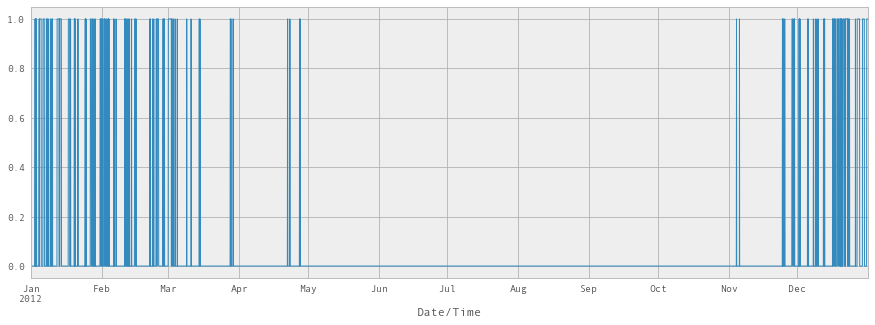

In [58]:
# More useful!
is_snowing.plot()

If we wanted the median temperature each month, we could use the resample() method like this

print weather first then resample by M - Others that work - D, A, S - can also modify into bins i.e. 30 second bins, 3 day bins etc etc.

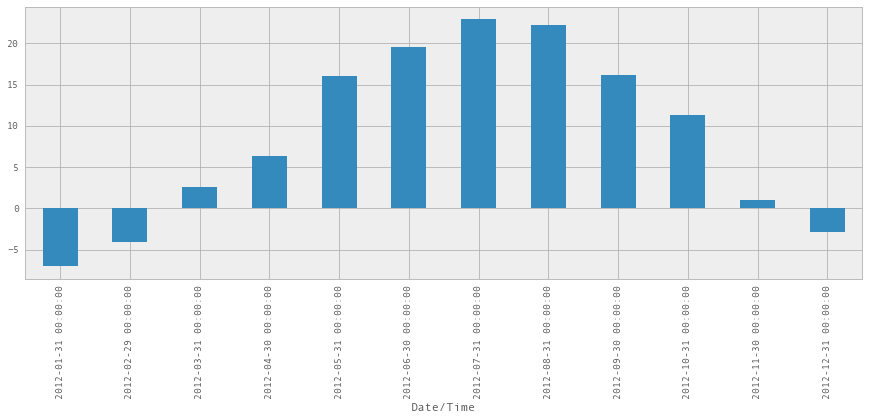

In [59]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

Resample - Convenience method for frequency conversion and resampling of time series data

Plotting temperature and snowiness stats for each month together

In [60]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d7450b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10fafe710>], dtype=object)

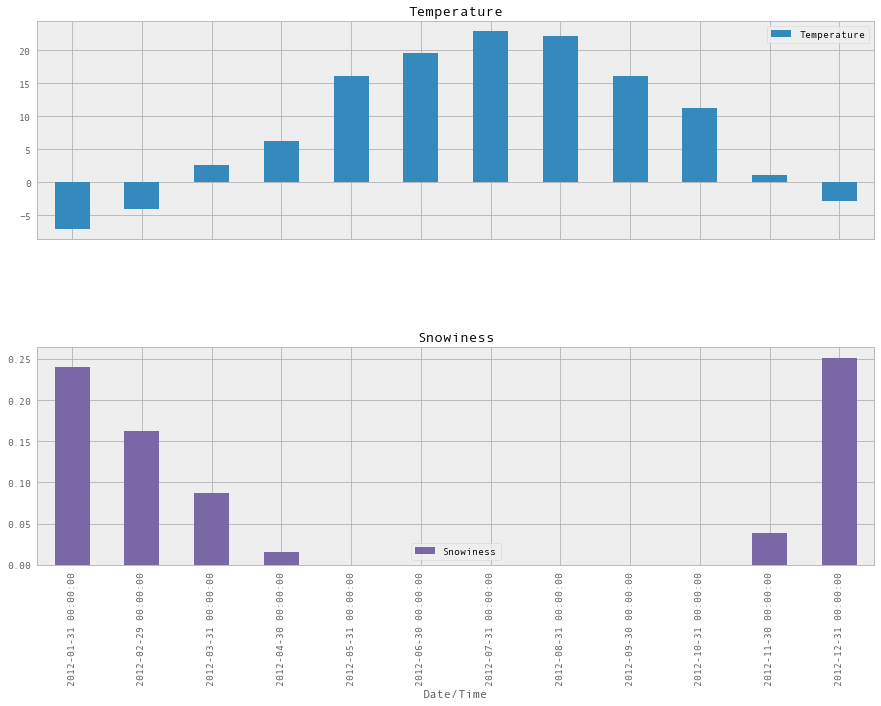

In [61]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

## Cleaning messy data

One of the first opperations when looking at a new data set
Using the NYC dataset - epicly big

Having looked at the data we know it has issues with respect to the Zip code

Easiest way to get a handle on this - lets look at unique values `.unique()` 

* Some have been parsed as strings, and some as floats
* There are `nan`s 
* Some of the zip codes are `29616-0759` or `83`
* There are some N/A values that pandas didn't recognize, like 'N/A' and 'NO CLUE'

plan of action 

* Normalize 'N/A' and 'NO CLUE' into regular nan values
* Look at what's up with the 83, and decide what to do
* Make everything strings

In [62]:
requests = pd.read_csv('data/311-service-requests.csv')

/Users/hamishrobertson/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
requests['Incident Zip'].unique()

array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

In [64]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('data/311-service-requests.csv', na_values=na_values, dtype={'Incident Zip': str})

In [65]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [66]:
len(requests[requests['Incident Zip'].isnull()])

12263

Clearly something like unique is a pretty useful tool

In [67]:
# lets also get rid of 'rows with dashes'
rows_with_dashes = requests['Incident Zip'].str.contains('-').fillna(False)
len(requests[rows_with_dashes])

5

So only 5 rows - lets search for them and just slice them up - 9 digit zip codes are used in big cities apparently

In [68]:
long_zip_codes = requests['Incident Zip'].str.len() > 5
requests['Incident Zip'][long_zip_codes].unique()

array(['77092-2016', '55164-0737', '000000', '11549-3650', '29616-0759',
       '35209-3114'], dtype=object)

In [69]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)

In [70]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',